In [5]:
echo ("# gender_detection") >> README.md
git (init)
git add (README.md)
git (commit -m "first commit")
git (remote add origin https://github.com/amu90/gender_detection.git)
git (push -u origin master)

SyntaxError: invalid syntax (<ipython-input-5-bd1451ae4ce1>, line 3)

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

Importing the dataset

In [318]:
voice = pd.read_excel('H:/data science/voice.xlsx')

In [319]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Check for any missing values in the features

In [320]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [321]:
voice.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

Converting the string variable to numeric type by mapping the classes to 0 and 1

In [322]:
voice['label'] = voice['label'].map({'male':1,'female':0})

In [323]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


**Scatter plot of given features**

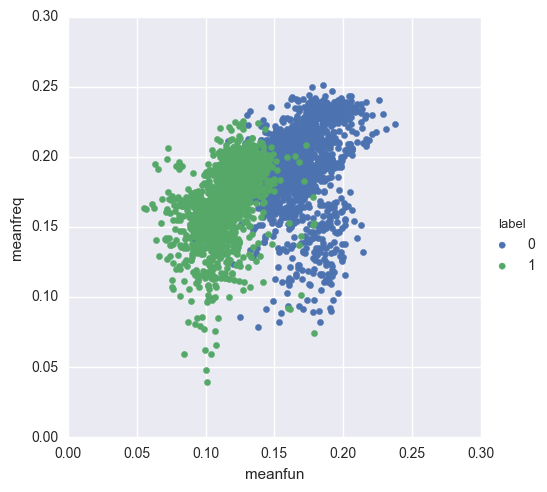

In [324]:
sns.FacetGrid(voice, hue="label", size=5).map(plt.scatter, "meanfun", "meanfreq").add_legend()
plt.savefig('H:/data science/meanfreq-meanfun.png')

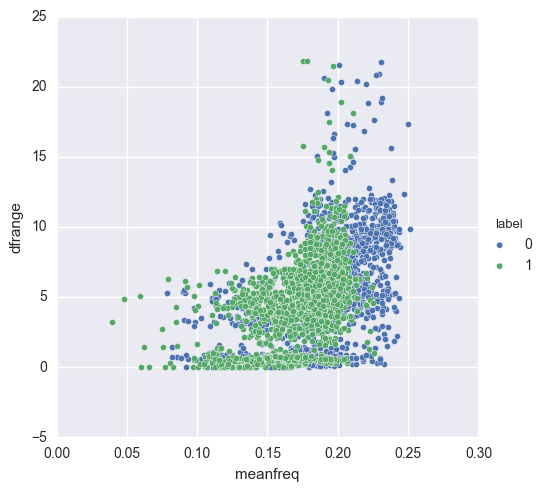

In [325]:
sns.pairplot(data=voice,hue='label', x_vars='meanfreq', y_vars='dfrange',size=5)
plt.savefig('H:/data science/meanfreq-dfrange.png')

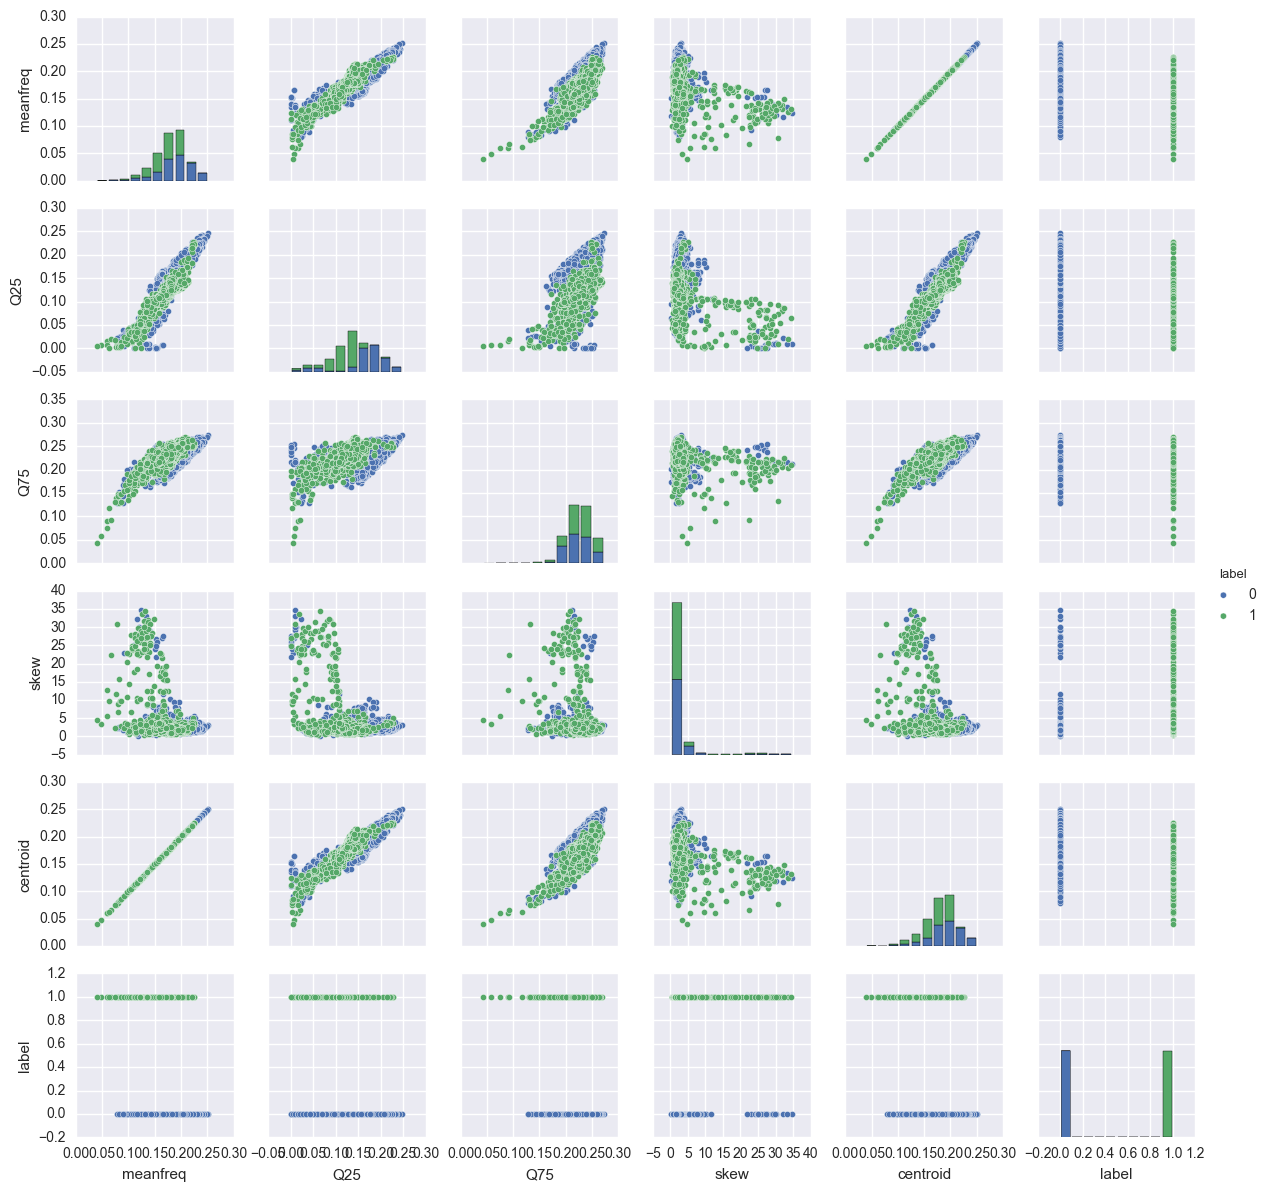

In [326]:
sns.pairplot(voice[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label', size=2)
plt.savefig('H:/data science/plots.png')

**Boxplot**

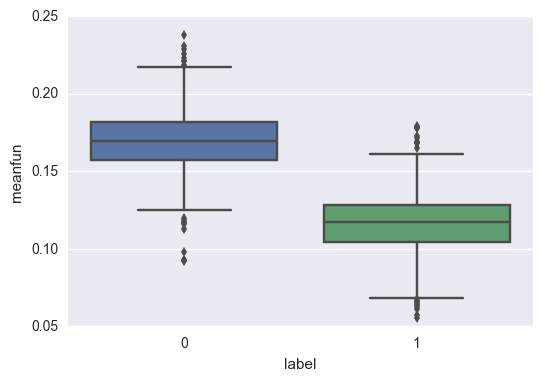

In [327]:
sns.boxplot(x="label",y="meanfun",data=voice)
plt.savefig('H:/data science/meanfun_box.png')

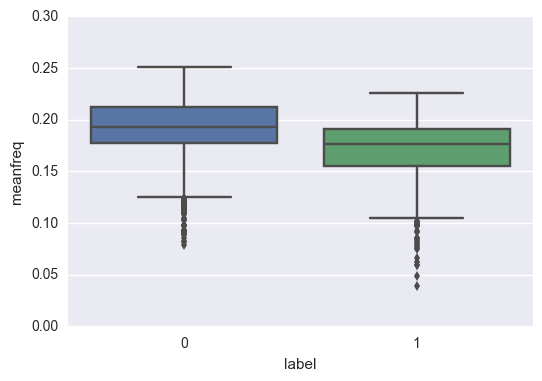

In [328]:
sns.boxplot(x="label",y="meanfreq",data=voice)
plt.savefig('H:/data science/meanfreq_box.png')

Other features can be visualized by substituting "meanfun" or "meanfreq" by other variables

**Heatmap**

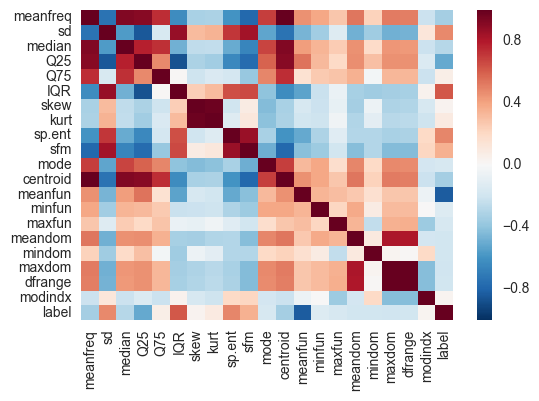

In [329]:
sns.heatmap(voice.corr())
plt.savefig('H:/data science/heatmap.png')

Showing the correlations of all features with the target variable, displayed in ascending order

In [330]:
voice_corr = voice.corr()
voice_corr = voice_corr[['label']].sort_values(by = 'label', ascending=False)
voice_corr

,label
label,1.000000
IQR,0.618916
sp.ent,0.490552
sd,0.479539
sfm,0.357499
kurt,0.087195
Q75,0.066906
skew,0.036627
modindx,0.030801
minfun,-0.136692


In [331]:
label = voice.label
voice.drop('label', axis=1, inplace=True)

In [332]:
from sklearn.preprocessing import StandardScaler
voice_std = StandardScaler().fit_transform(voice)

In [333]:
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.feature_selection import SelectFromModel
clf = ETC(n_estimators=250)
clf = clf.fit(voice_std, label)

In [334]:
features = pd.DataFrame()
features['feature'] = voice.columns
features['importance'] = clf.feature_importances_
features.sort(['importance'],ascending=False)

C:\Users\parag\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,feature,importance
12,meanfun,0.278744
5,IQR,0.196839
3,Q25,0.105883
1,sd,0.101992
8,sp.ent,0.041216
9,sfm,0.033988
10,mode,0.027009
11,centroid,0.026033
0,meanfreq,0.024800
4,Q75,0.019885


Showing the importance of various features with respect to the target variable

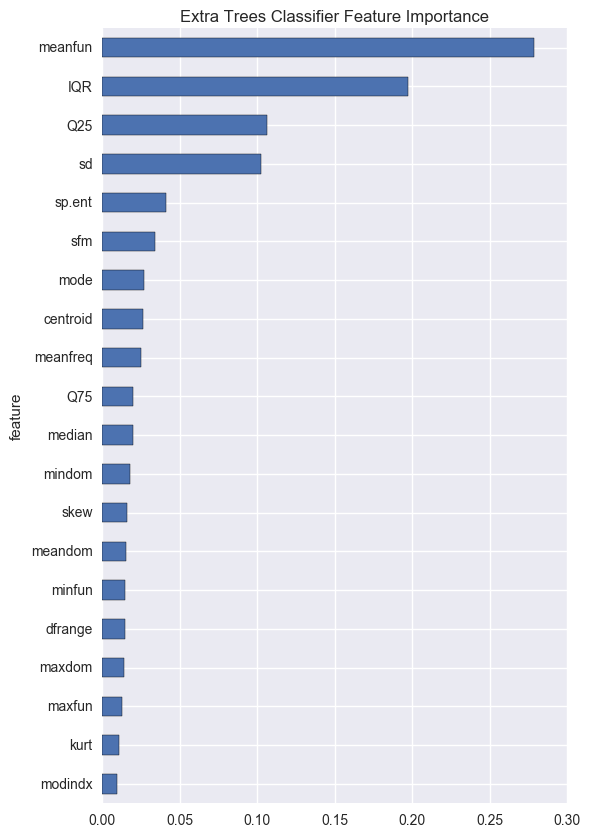

In [335]:
featp = features.sort_values(by='importance')[-20:].plot(kind='barh', x='feature', y='importance', legend=False, figsize=(6, 10))
plt.title('Extra Trees Classifier Feature Importance')
fig_featp = featp.get_figure()
fig_featp.savefig('feature_importance_gbc.png', bbox_inches='tight', pad_inches=1)
plt.savefig('H:/data science/feature_importance.png')

Applying PCA technique to reduce the features such that total explained variance is maximum

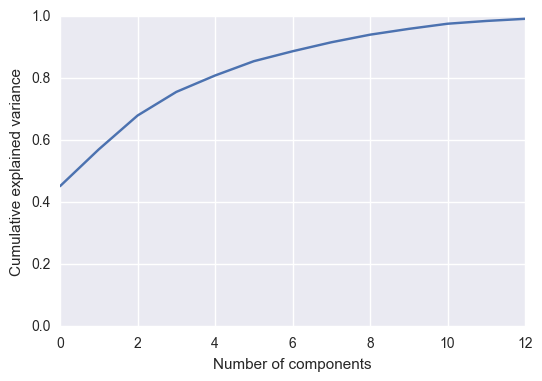

In [336]:
from sklearn.decomposition import PCA
pca = PCA().fit(voice_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,12)
plt.ylim(0,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig('H:/data science/pca.png')

Hence, 12 features are sufficient to explain the total variance in the dataset. We work with only 12 features hereafter.

In [337]:
sklearn_pca = PCA(n_components=12)
voice_std = sklearn_pca.fit_transform(voice_std)

In [338]:
voice_std.shape

(3168, 12)

In [339]:
from sklearn.cross_validation import train_test_split
voice_train, voice_test, label_train, label_test = train_test_split(voice_std, label, test_size=0.25)

In [340]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC()

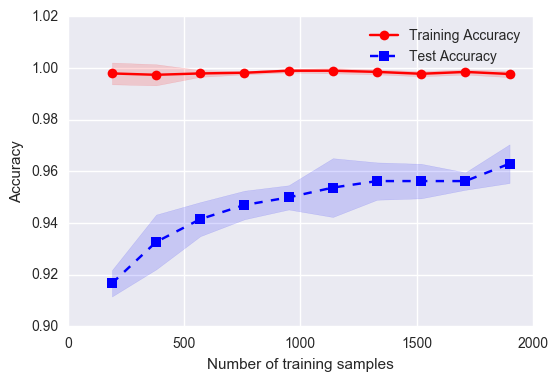

In [341]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                       X=voice_train,
                                                       y=label_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=5)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('H:/data science/learning_curve.png')
plt.show()

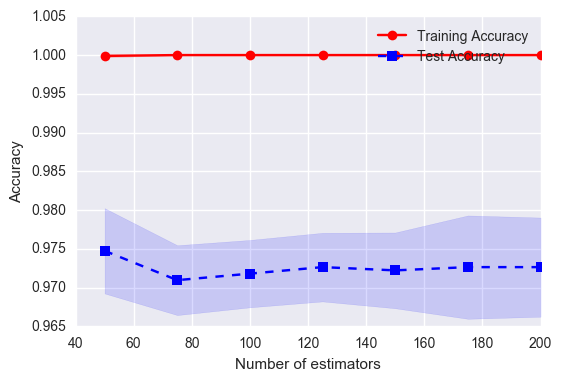

In [342]:
from sklearn.model_selection import validation_curve

param_range = [50,75,100,125,150,175,200]
train_scores, test_scores = validation_curve(estimator=model,
                                             X=voice_train,
                                             y=label_train,
                                             param_name='n_estimators',
                                             param_range=param_range,
                                             cv=5)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')


plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('H:/data science/val_curve.png')
plt.show()

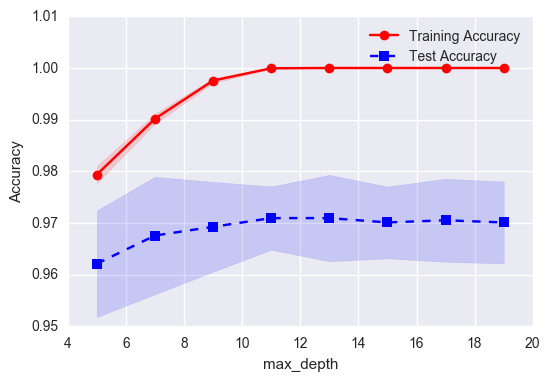

In [343]:
from sklearn.model_selection import validation_curve

param_range = [5,7,9,11,13,15,17,19]
train_scores, test_scores = validation_curve(estimator=model,
                                             X=voice_train,
                                             y=label_train,
                                             param_name='max_depth',
                                             param_range=param_range,
                                             cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')


plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('H:/data science/val_curve_maxdepth.png')
plt.show()

In [383]:
from sklearn.ensemble import RandomForestClassifier as RFC

model = RFC(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-04, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=120)

model.fit_transform(voice_train, label_train)
model.score(voice_test, label_test)

C:\Users\parag\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0.98232323232323238

In [348]:
out = model.predict(voice_test)

In [384]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold= roc_curve(label_test, out)
roc_auc = auc(fpr, tpr)
roc_auc

0.98236235942513417

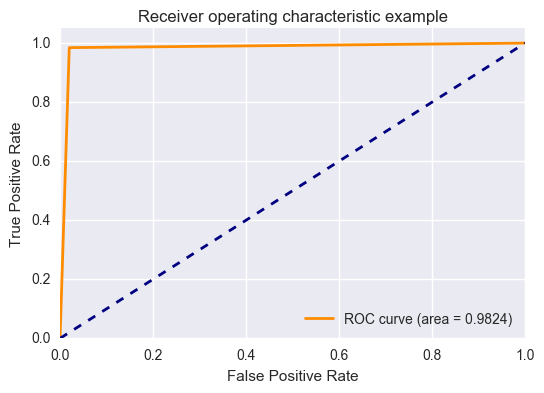

In [385]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('H:/data science/auc_roc_plot.png')
plt.show()